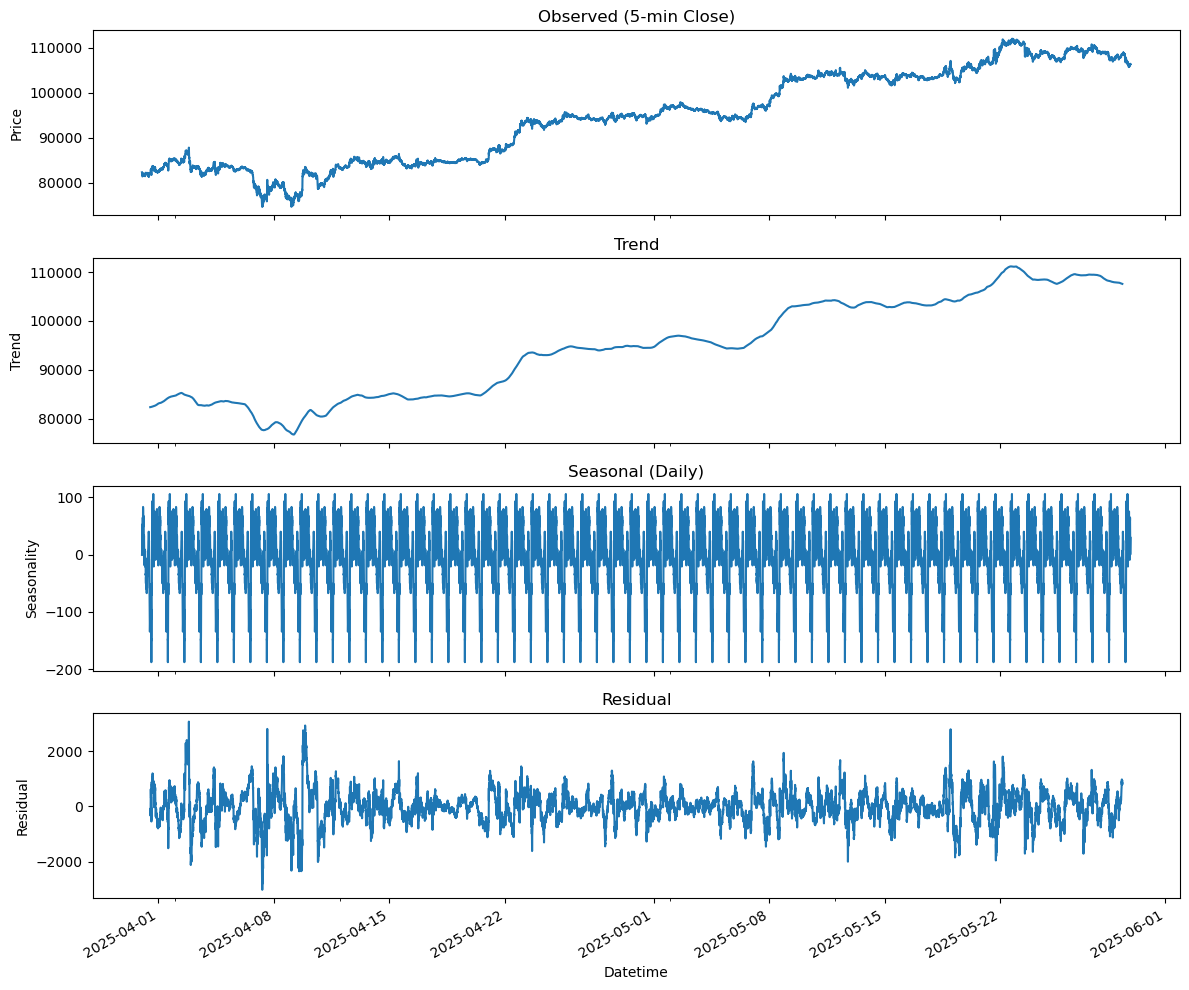

In [4]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# 1. Load the 5-minute OHLCV CSV and set the DateTime index
df = pd.read_csv(
    'btc_basic.csv',
    parse_dates=['Datetime']
)
df = df.set_index('Datetime').sort_index()

# 2. Extract the “Close” series, forward-fill any gaps, and drop NaNs
ts = df['Close'].ffill().dropna()

# 3. Perform seasonal decomposition with a daily cycle (288 intervals = 24h × 60m / 5m)
decomp = seasonal_decompose(ts, model='additive', period=288)

# 4. Plot the four components (Observed, Trend, Seasonal, Residual)
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

decomp.observed.plot(ax=axes[0], title='Observed (5-min Close)')
axes[0].set_ylabel('Price')

decomp.trend.plot(ax=axes[1], title='Trend')
axes[1].set_ylabel('Trend')

decomp.seasonal.plot(ax=axes[2], title='Seasonal (Daily)')
axes[2].set_ylabel('Seasonality')

decomp.resid.plot(ax=axes[3], title='Residual')
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Datetime')

plt.tight_layout()
plt.savefig("2month5mins_sea.pdf")


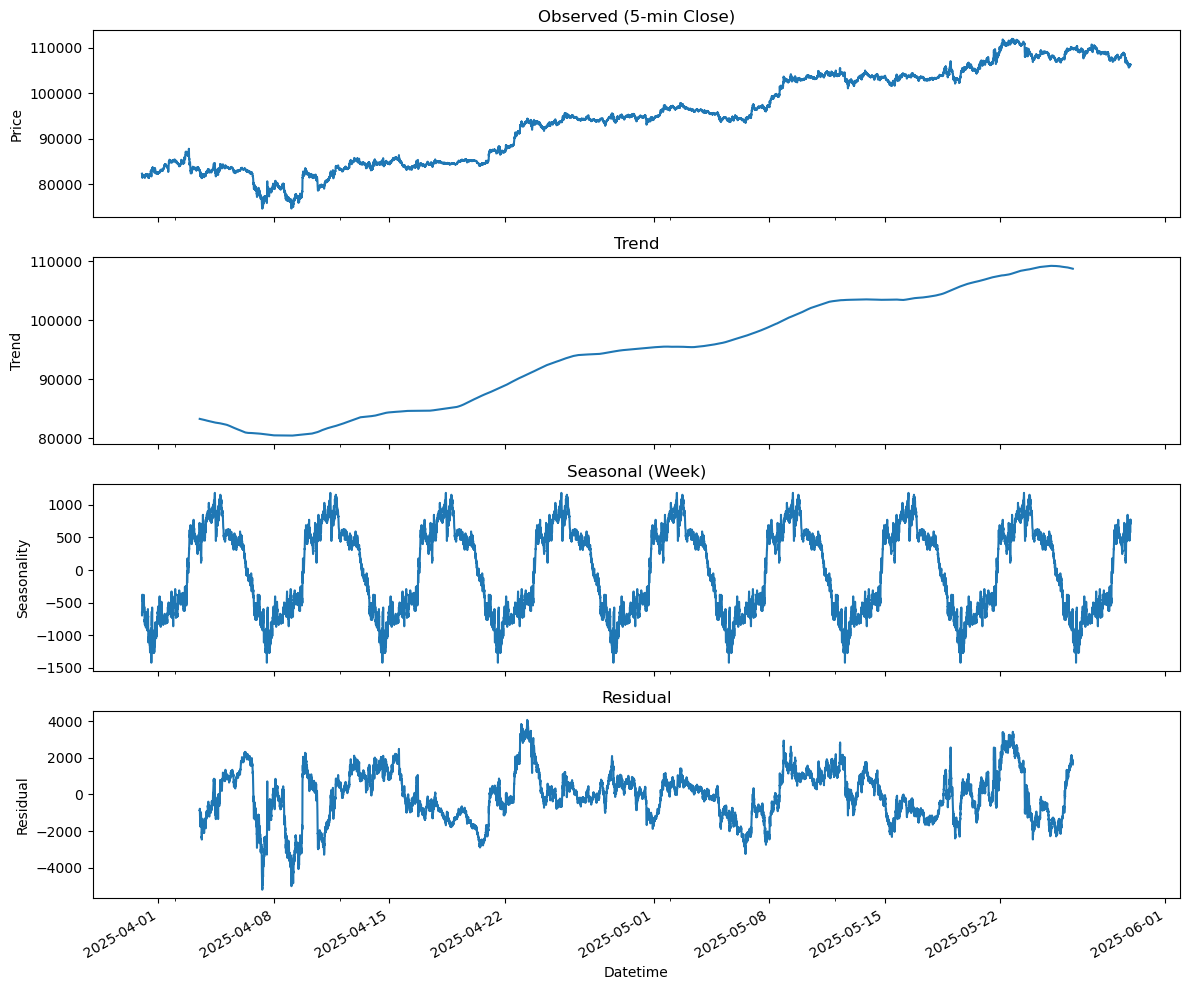

In [7]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# 1. Load the 5-minute OHLCV CSV and set the DateTime index
df = pd.read_csv(
    'btc_basic.csv',
    parse_dates=['Datetime']
)
df = df.set_index('Datetime').sort_index()

# 2. Extract the “Close” series, forward-fill any gaps, and drop NaNs
ts = df['Close'].ffill().dropna()

# 3. Perform seasonal decomposition with a daily cycle (288 intervals = 24h × 60m / 5m)
decomp = seasonal_decompose(ts, model='additive', period=288*7)

# 4. Plot the four components (Observed, Trend, Seasonal, Residual)
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

decomp.observed.plot(ax=axes[0], title='Observed (5-min Close)')
axes[0].set_ylabel('Price')

decomp.trend.plot(ax=axes[1], title='Trend')
axes[1].set_ylabel('Trend')

decomp.seasonal.plot(ax=axes[2], title='Seasonal (Week)')
axes[2].set_ylabel('Seasonality')

decomp.resid.plot(ax=axes[3], title='Residual')
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Datetime')

plt.tight_layout()
plt.savefig("2month5mins_sea_week.pdf")
